In [8]:
import numpy as np

import matplotlib.pyplot as plt

from  src.plotting.temporary_plot_utils  import  *
from src.pet_3.data import PetsDataFetcher
from src.models.UNet import UNet
import matplotlib as mpl
mpl.style.use("default")
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "Computer Modern"
mpl.rcParams["text.usetex"] = True


In [9]:
TOTAL_BATCH_SIZE = 32
LABEL_PROPORTION = 0.01
VALIDATION_PROPORTION = 0.1

fetcher = PetsDataFetcher(root="src/pet_3")
(labeled, validation, unlabeled), name = fetcher.get_train_data_with_name(
    LABEL_PROPORTION, VALIDATION_PROPORTION, seed=1, class_balance=True
)

In [10]:
# DMT
dmt_01 = UNet.from_state_dict(torch.load("models/vary_label_proportion/dmt_0.01.pt", map_location=torch.device("cuda")))
dmt_02 = UNet.from_state_dict(torch.load("models/vary_label_proportion/dmt_0.02.pt", map_location=torch.device("cuda")))
dmt_05 = UNet.from_state_dict(torch.load("models/vary_label_proportion/dmt_0.05.pt", map_location=torch.device("cuda")))
dmt_10 = UNet.from_state_dict(torch.load("models/vary_label_proportion/dmt_0.1.pt", map_location=torch.device("cuda")))
dmt_50 = UNet.from_state_dict(torch.load("models/vary_label_proportion/dmt_0.5.pt", map_location=torch.device("cuda")))
dmt_80 = UNet.from_state_dict(torch.load("models/vary_label_proportion/dmt_0.8.pt", map_location=torch.device("cuda")))
dmt_100 = UNet.from_state_dict(torch.load("models/vary_label_proportion/dmt_0.95.pt", map_location=torch.device("cuda")))

# Plabel
plabel_01 = UNet.from_state_dict(torch.load("models/plabel_vary_label_proportion/plabel_0.01.pt", map_location=torch.device("cuda")))
plabel_02 = UNet.from_state_dict(torch.load("models/plabel_vary_label_proportion/plabel_0.02.pt", map_location=torch.device("cuda")))
plabel_05 = UNet.from_state_dict(torch.load("models/plabel_vary_label_proportion/plabel_0.05.pt", map_location=torch.device("cuda")))
plabel_10 = UNet.from_state_dict(torch.load("models/plabel_vary_label_proportion/plabel_0.1.pt", map_location=torch.device("cuda")))
plabel_50 = UNet.from_state_dict(torch.load("models/plabel_vary_label_proportion/plabel_0.5.pt", map_location=torch.device("cuda")))
plabel_80 = UNet.from_state_dict(torch.load("models/plabel_vary_label_proportion/plabel_0.8.pt", map_location=torch.device("cuda")))
plabel_100 = UNet.from_state_dict(torch.load("models/plabel_vary_label_proportion/plabel_0.95.pt", map_location=torch.device("cuda")))

# Unet
unet_01 = UNet.from_state_dict(torch.load("models/baselines/baseline_0.01_1.pt", map_location=torch.device("cuda")))
unet_02 = UNet.from_state_dict(torch.load("models/baselines/baseline_0.02_1.pt", map_location=torch.device("cuda")))
unet_05 = UNet.from_state_dict(torch.load("models/baselines/baseline_0.05_1.pt", map_location=torch.device("cuda")))
unet_10 = UNet.from_state_dict(torch.load("models/baselines/baseline_0.1_1.pt", map_location=torch.device("cuda")))
unet_50 = UNet.from_state_dict(torch.load("models/baselines/baseline_0.5_1.pt", map_location=torch.device("cuda")))
unet_80 = UNet.from_state_dict(torch.load("models/baselines/baseline_0.8_1.pt", map_location=torch.device("cuda")))
unet_100 = UNet.from_state_dict(torch.load("models/baselines/baseline_0.95_1.pt", map_location=torch.device("cuda")))

Using cache found in /home/sean/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master
Using cache found in /home/sean/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master
Using cache found in /home/sean/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master
Using cache found in /home/sean/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master
Using cache found in /home/sean/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master
Using cache found in /home/sean/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master
Using cache found in /home/sean/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master
Using cache found in /home/sean/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master
Using cache found in /home/sean/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master
Using cache found in /home/sean/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master
Using cache found in /home/sean/.cache/torch/hub/m

In [11]:
i = 0

image = labeled[i][0].unsqueeze(0)
label = labeled[i][1].unsqueeze(0).reshape(256, 256)

Text(0.5, 1.0, 'Label')

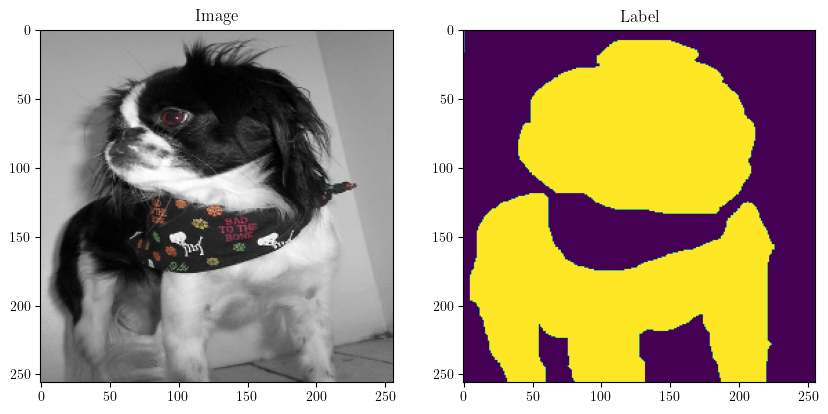

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(image[0].numpy().transpose(1, 2, 0))
ax1.set_title("Image")

ax2.imshow(label)
ax2.set_title("Label")

In [13]:
dmt_01_conf = dmt_01(image).squeeze().detach().numpy()[:,1].reshape(256, 256)
dmt_02_conf = dmt_02(image).squeeze().detach().numpy()[:,1].reshape(256, 256)
dmt_05_conf = dmt_05(image).squeeze().detach().numpy()[:,1].reshape(256, 256)
dmt_10_conf = dmt_10(image).squeeze().detach().numpy()[:,1].reshape(256, 256)
dmt_50_conf = dmt_50(image).squeeze().detach().numpy()[:,1].reshape(256, 256)
dmt_80_conf = dmt_80(image).squeeze().detach().numpy()[:,1].reshape(256, 256)
dmt_100_conf = dmt_100(image).squeeze().detach().numpy()[:,1].reshape(256, 256)

plabel_01_conf = plabel_01(image).squeeze().detach().numpy()[:,1].reshape(256, 256)
plabel_02_conf = plabel_02(image).squeeze().detach().numpy()[:,1].reshape(256, 256)
plabel_05_conf = plabel_05(image).squeeze().detach().numpy()[:,1].reshape(256, 256)
plabel_10_conf = plabel_10(image).squeeze().detach().numpy()[:,1].reshape(256, 256)
plabel_50_conf = plabel_50(image).squeeze().detach().numpy()[:,1].reshape(256, 256)
plabel_80_conf = plabel_80(image).squeeze().detach().numpy()[:,1].reshape(256, 256)
plabel_100_conf = plabel_100(image).squeeze().detach().numpy()[:,1].reshape(256, 256)

unet_01_conf = unet_01(image).squeeze().detach().numpy()[:,1].reshape(256, 256)
unet_02_conf = unet_02(image).squeeze().detach().numpy()[:,1].reshape(256, 256)
unet_05_conf = unet_05(image).squeeze().detach().numpy()[:,1].reshape(256, 256)
unet_10_conf = unet_10(image).squeeze().detach().numpy()[:,1].reshape(256, 256)
unet_50_conf = unet_50(image).squeeze().detach().numpy()[:,1].reshape(256, 256)
unet_80_conf = unet_80(image).squeeze().detach().numpy()[:,1].reshape(256, 256)
unet_100_conf = unet_100(image).squeeze().detach().numpy()[:,1].reshape(256, 256)

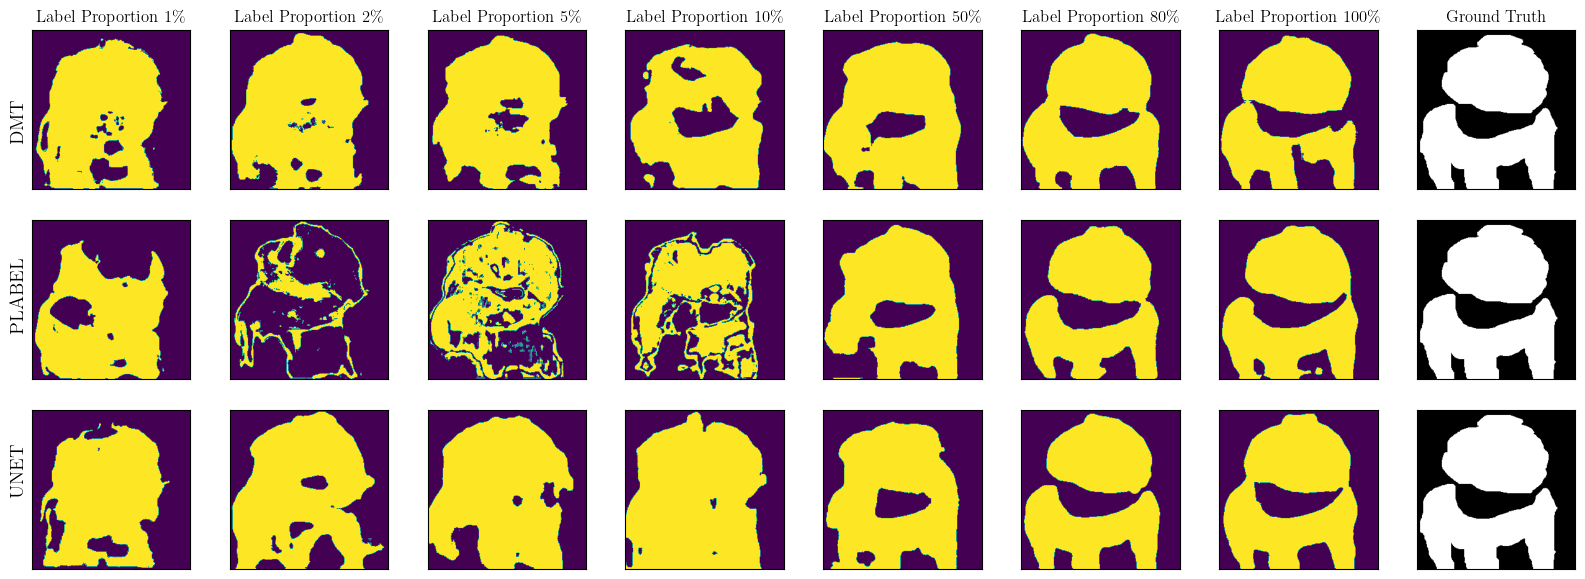

In [15]:
fig, axs, = plt.subplots(3, 8, figsize=(20, 7), sharex=True)  # create a row of 5 subplots

plt.set_cmap('viridis')

# DMT
axs[0,0].imshow(np.where(dmt_01_conf >= 0.5, 1, 0))
axs[0,0].set_title(r"Label Proportion $1\%$")

axs[0,1].imshow(np.where(dmt_02_conf >= 0.5, 1, 0))
axs[0,1].set_title(r"Label Proportion $2\%$")

axs[0,2].imshow(np.where(dmt_05_conf >= 0.5, 1, 0))
axs[0,2].set_title(r"Label Proportion $5\%$")

axs[0,3].imshow(np.where(dmt_10_conf >= 0.5, 1, 0))
axs[0,3].set_title(r"Label Proportion $10\%$")

axs[0,4].imshow(np.where(dmt_50_conf >= 0.5, 1, 0))
axs[0,4].set_title(r"Label Proportion $50\%$")

axs[0,5].imshow(np.where(dmt_80_conf >= 0.5, 1, 0))
axs[0,5].set_title(r"Label Proportion $80\%$")

axs[0,6].imshow(np.where(dmt_100_conf >= 0.5, 1, 0))
axs[0,6].set_title(r"Label Proportion $100\%$")

axs[0,7].imshow(label, cmap='gray')
axs[0,7].set_title("Ground Truth")

# PLABEL
axs[1,0].imshow(np.where(plabel_01_conf >= 0.5, 1, 0))
axs[1,1].imshow(np.where(plabel_02_conf >= 0.5, 1, 0))
axs[1,2].imshow(np.where(plabel_05_conf >= 0.5, 1, 0))
axs[1,3].imshow(np.where(plabel_10_conf >= 0.5, 1, 0))
axs[1,4].imshow(np.where(plabel_50_conf >= 0.5, 1, 0))
axs[1,5].imshow(np.where(plabel_80_conf >= 0.5, 1, 0))
axs[1,6].imshow(np.where(plabel_100_conf >= 0.5, 1, 0))
axs[1,7].imshow(label, cmap='gray')

# UNET
axs[2,0].imshow(np.where(unet_01_conf >= 0.5, 1, 0))
axs[2,1].imshow(np.where(unet_02_conf >= 0.5, 1, 0))
axs[2,2].imshow(np.where(unet_05_conf >= 0.5, 1, 0))
axs[2,3].imshow(np.where(unet_10_conf >= 0.5, 1, 0))
axs[2,4].imshow(np.where(unet_50_conf >= 0.5, 1, 0))
axs[2,5].imshow(np.where(unet_80_conf >= 0.5, 1, 0))
axs[2,6].imshow(np.where(unet_100_conf >= 0.5, 1, 0))
axs[2,7].imshow(label, cmap='gray')


# meshgrid
for i in range(3):
    for j in range(8):
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])


fig.text(0.12, 0.75, "DMT", ha='center', va='center', fontsize=14, rotation=90, fontweight='bold')
fig.text(0.12, 0.5, "PLABEL", ha='center', va='center', fontsize=14, rotation=90, fontweight='bold')
fig.text(0.12, 0.25, "UNET", ha='center', va='center', fontsize=14, rotation=90, fontweight='bold')


plt.show()  # display the plot



# save figure
fig.savefig('model_comparison.png', dpi =300)